# btc

In [1]:
%matplotlib notebook

import datetime
from pathlib import Path
import sqlite3

import pandas as pd

db_filename = f'{Path.home()}/var/trader/db/trader.db'
connection = sqlite3.connect(db_filename)

In [2]:
query = f'''
  SELECT h.timestamp AS time,
         h.close AS close
    FROM market_hourly_prices AS h
    JOIN markets AS m
          ON m.id = h.market_id
   WHERE m.base = 'BTC'
'''

df = pd.read_sql(query, connection, index_col='time', parse_dates={'time': 's'})
df2020 = df.loc['2020']
df2020

,close
time,
2020-01-01 00:00:00,6392.6
2020-01-01 01:00:00,6432.6
2020-01-01 04:00:00,6446.7
2020-01-01 06:00:00,6455.0
2020-01-01 07:00:00,6424.6
...,...
2020-12-31 19:00:00,23693.0
2020-12-31 20:00:00,23869.0
2020-12-31 21:00:00,23728.0


In [3]:
def rsi(df, periods = 14, ema = True):
    """
    Returns a pd.Series with the relative strength index.
    """
    close_delta = df['close'].diff()

    # Make two series: one for lower closes and one for higher closes
    up = close_delta.clip(lower=0)
    down = -1 * close_delta.clip(upper=0)
    
    if ema == True:
	    # Use exponential moving average
        ma_up = up.ewm(com = periods - 1, adjust=True, min_periods = periods).mean()
        ma_down = down.ewm(com = periods - 1, adjust=True, min_periods = periods).mean()
    else:
        # Use simple moving average
        ma_up = up.rolling(window = periods, adjust=False).mean()
        ma_down = down.rolling(window = periods, adjust=False).mean()
        
    rsi = ma_up / ma_down
    rsi = 100 - (100/(1 + rsi))
    return rsi

<IPython.core.display.Javascript object>


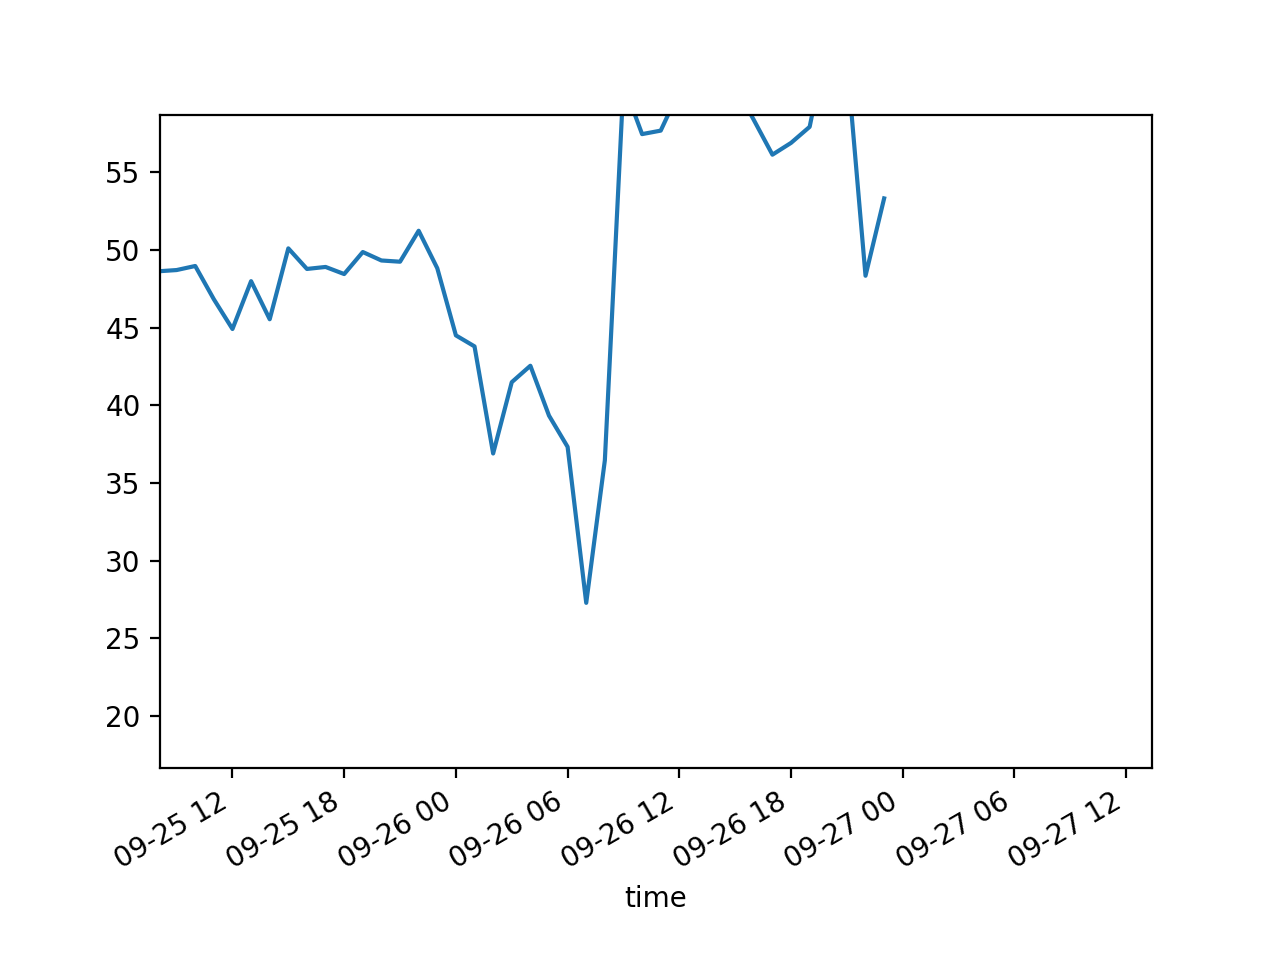

<AxesSubplot:xlabel='time'>

In [4]:
df2021 = df.loc['2021-01':'2021-09']
rsi2021 = rsi(df2021)
rsi2021.plot()